<a href="https://colab.research.google.com/github/IvanJaimesN/ProbabilityClasses/blob/main/Estimando%20una%20distribuci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

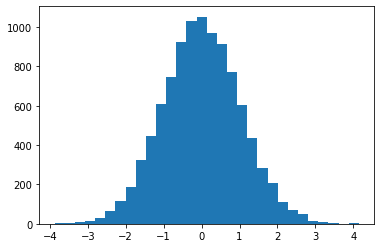

In [3]:
sample = normal(size = 10000) # generador de datos aleatorio, se emplea el numpy.random basado en la distribución normal

pyplot.hist(sample, bins = 30)

pyplot.show()

## Estimación paramétrica



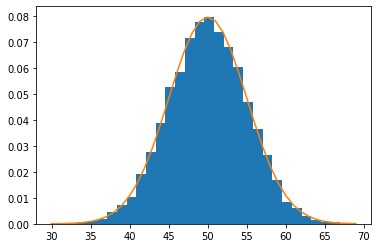

In [7]:
# E. paramétrica está basada en forzar los parámetros de la distribución

sample = normal(loc=50, scale=5, size=10000) # mu = 50, sigma = 5

# Ajustar una distribución gaussiana
mu = sample.mean()
sigma = sample.std()

# Creación de la distribución
dist = norm(mu, sigma)

# Construcción  de los valores numéricos donde se va a evaluar la distribución
values = [value for value in range(30,70)]

# Calculo de las probabilidades de cada uno de los valores
probabilidades = [dist.pdf(value) for value in values]

pyplot.hist(sample, bins = 30, density=True)  # Gráfica con valores normalizados

pyplot.plot(values, probabilidades)

pyplot.show()


# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html

In [8]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth = 2, kernel = 'gaussian') # bandwidth, parámetro de suavizado

sample = sample.reshape(len(sample), 1)

model.fit(sample)

KernelDensity(algorithm='auto', atol=0, bandwidth=2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

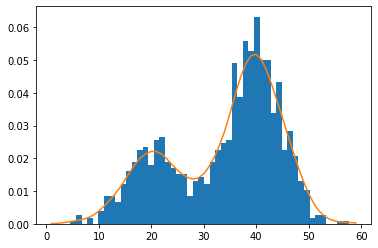

In [9]:
# 
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica, en logaritmos para evitar underflow
probabilities = np.exp(probabilities)  # inversión de probabilidad

pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()